Linear Regression Algo

In [ ]:
import numpy as np
import pandas as pd
import sklearn
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
bos1 = pd.read_csv('housing.csv',delimiter=r"\s+", names=column_names)

In [ ]:
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Preprocessing

In [ ]:
bos1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Spliting into training(70) and testing(30)

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(bos1.iloc[:,0:13])
Y = np.array(bos1["MEDV"])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 5)

Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

Model Evaluation

In [ ]:
#error in lr
mse_lr = sklearn.metrics.mean_squared_error(Y_test, pred_lr, squared = False)
print('error in lr={}'.format(mse_lr))

error in lr=5.540490745781336


Naive Bayes Algorithm


In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_test = pd.read_csv('SalaryData_Test(1).csv')
string_columns = ['workclass','education','maritalstatus', 'occupation', 'relationship' , 'race', 'sex', 'native']
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Label Encoder

In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
  salary_train[i] = number.fit_transform(salary_train[i])
  salary_test[i] = number.fit_transform(salary_test[i])

In [ ]:
colnames= salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX = salary_test[colnames[0:13]]
testY = salary_test[colnames[13]]

In [ ]:
sgnb = GaussianNB()

In [ ]:
spred_gnb = sgnb.fit(trainX,trainY).predict(testX)

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(testY, spred_gnb)
print(cm_gnb)
print('accuracy',(10759+1209)/(10759+601+2491+1209))

[[10759   601]
 [ 2491  1209]]
accuracy 0.7946879150066402


K-NN Algorithmn

boston data

In [ ]:
import numpy as np
import pandas as pd
import sklearn
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
bos1 = pd.read_csv('housing.csv',delimiter=r"\s+", names=column_names)

In [ ]:
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
bos1.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(bos1.iloc[:,0:13])
Y = np.array(bos1["MEDV"])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 5)

KNN algo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
lr.fit(X_train, Y_train)
Nn =KNeighborsRegressor(4)
Nn.fit(X_train, Y_train)
pred_Nn = Nn.predict(X_test)

In [ ]:
mse_Nn = sklearn.metrics.mean_squared_error(Y_test, pred_Nn, squared = False)
print('error in KNN={}'.format(mse_Nn))

error in KNN=7.004019640065342


Support Vector machine Algomithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Filtering column

In [ ]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

split 75/25

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state= 0)

standard scaler for Distribution

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Bulding model RBL

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC (kernel= 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)
y_pred_rbf = classifier_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rbf = confusion_matrix (y_test, y_pred_rbf)
print(cm_rbf)

[[64  4]
 [ 3 29]]


In [ ]:
from sklearn.metrics import classification_report
class_report_rbf = classification_report (y_test, y_pred_rbf)
print(class_report_rbf)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Random Forest Algorithm**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Position_Salaries.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:,1:2].values
Y = df.iloc[:,2].values

model fitting with 10 tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators= 10, random_state = 0)
model1.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
Y_pred = model1.predict([[6.5]])

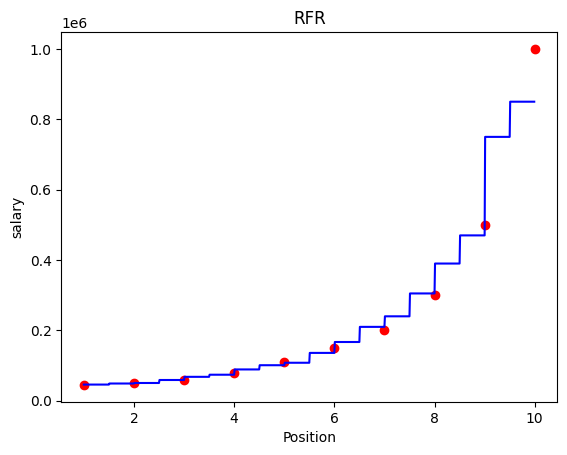

In [ ]:
X_grid_data = np.arange(min(X), max(X), 0.01)
X_grid_data = X_grid_data.reshape(len(X_grid_data),1)
plt.scatter(X,Y,color = 'red')
plt.plot(X_grid_data, model1.predict(X_grid_data), color ='blue')
plt.title('RFR')
plt.xlabel('Position')
plt.ylabel('salary')
plt.show()